In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import datetime as dt

In [7]:
date = pd.read_csv('orders.csv')
time = pd.read_csv('messages.csv')

In [10]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [11]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [18]:
date.date = pd.to_datetime(date.date)
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [17]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


## **extract year**

In [25]:
date['date_year'] = date.date.dt.year
date['date_month'] = date.date.dt.month
date['month_name'] = date.date.dt.month_name()
date['date_day'] = date.date.dt.day
date.head()

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [29]:
# day of week
date['day_of_week'] = date.date.dt.dayofweek
date['day_of_week_name'] = date.date.dt.day_name()
date.head()

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,day_of_week,day_of_week_name
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday


In [37]:
# is weekend ?
date['is_weekend'] = np.where(date['day_of_week'] >=5, 1, 0)
date['is_weekend2'] = np.where(date.day_of_week_name.isin(['Saturday', 'Sunday']), 1, 0)
date.shape


(1000, 12)

In [45]:
# extract week of the year
date['date_week_of_year'] = date.date.dt.isocalendar().week
date.head()

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,day_of_week,day_of_week_name,is_weekend,is_weekend2,date_week_of_year
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,0,50
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,0,33
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,0,43
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,1,33
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1


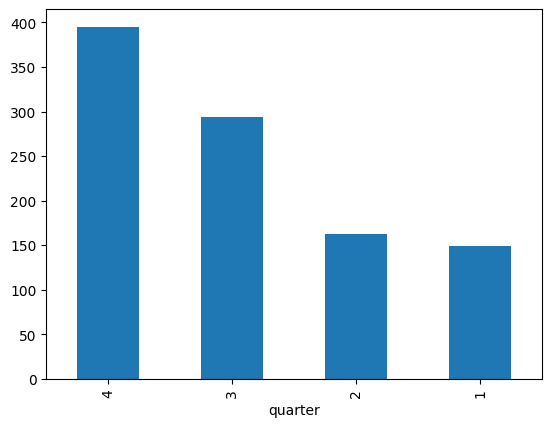

In [48]:
date['quarter'] = date.date.dt.quarter
date.head()
date.quarter.value_counts().plot(kind='bar')
plt.show()

In [50]:
# extract semester
date['semester'] = np.where(date.quarter.isin([1,2]) , 1 , 2)
date.head()

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,day_of_week,day_of_week_name,is_weekend,is_weekend2,date_week_of_year,quarter,semester
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,0,50,4,2
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,0,33,3,2
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,0,43,4,2
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,1,33,3,2
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1,1,1


In [53]:
# extract time elapsed between two dates
import datetime;
today = datetime.datetime.today()
today

datetime.datetime(2025, 12, 8, 9, 5, 55, 537268)

In [60]:
today- date.date[0:5]

0   2190 days 09:05:55.537268
1   2672 days 09:05:55.537268
2   2603 days 09:05:55.537268
3   2305 days 09:05:55.537268
4   2528 days 09:05:55.537268
Name: date, dtype: timedelta64[ns]

In [58]:
(today- date.date).dt.days[0:5]

0    2190
1    2672
2    2603
3    2305
4    2528
Name: date, dtype: int64

In [69]:
# month passed
np.round((today - date.date) / np.timedelta64(1, 'W'),0)

0      313.0
1      382.0
2      372.0
3      329.0
4      361.0
       ...  
995    374.0
996    366.0
997    344.0
998    353.0
999    321.0
Name: date, Length: 1000, dtype: float64

# **Time**

In [70]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [71]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [75]:
time.date = pd.to_datetime(time.date)
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [76]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [80]:
time['hour'] = time.date.dt.hour
time['minute'] = time.date.dt.minute
time['second'] = time.date.dt.second
time.head()

,date,hour,minute,second
0,2013-12-15 00:50:00,0,50,0
1,2014-04-29 23:40:00,23,40,0
2,2012-12-30 00:21:00,0,21,0
3,2014-11-28 00:31:00,0,31,0
4,2013-10-26 23:11:00,23,11,0


In [83]:
time['time'] = time.date.dt.time
time.head()

,date,hour,minute,second,time
0,2013-12-15 00:50:00,0,50,0,00:50:00
1,2014-04-29 23:40:00,23,40,0,23:40:00
2,2012-12-30 00:21:00,0,21,0,00:21:00
3,2014-11-28 00:31:00,0,31,0,00:31:00
4,2013-10-26 23:11:00,23,11,0,23:11:00


In [85]:
today - time.date[0:5]

0   4376 days 08:15:55.537268
1   4240 days 09:25:55.537268
2   4726 days 08:44:55.537268
3   4028 days 08:34:55.537268
4   4425 days 09:54:55.537268
Name: date, dtype: timedelta64[ns]